In [160]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt

### Step 1: Data Exploration

In [180]:
# Read in the data
game = pd.read_csv("cookie_cats.csv")

# Turn into df
original_df = pd.DataFrame(game)

# Copy the df
game_df = original_df.copy()

In [134]:
# Look at the first five rows
game_df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [135]:
# Check the shape of data
game_df.shape

(90189, 5)

In [136]:
# Check the data type and null value
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [68]:
# Check summary statistics for numeric column
game_df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [181]:
# Target Variable: Version
# See if the number of both groups are similar, and observe the difference in mean, std, min, max
game_df.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "min", "max"])

,count,median,mean,std,min,max
version,,,,,,
gate_30,44700,17.0,52.456264,256.716423,0,49854
gate_40,45489,16.0,51.298776,103.294416,0,2640


Text(0.5, 1.0, 'Gate_40 sum_gamerounds')

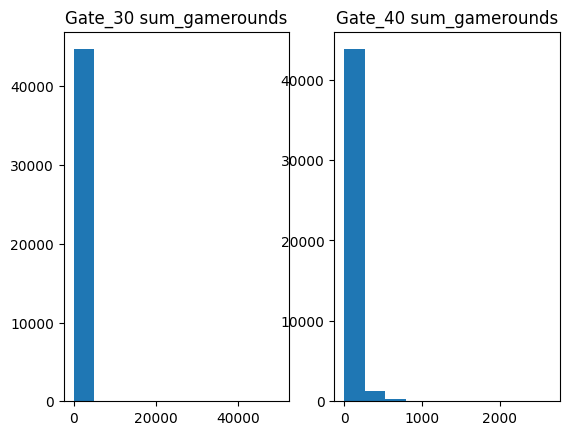

In [182]:
# Check data distribution for both group
fig, (ax1, ax2) = plt.subplots(1, 2)

game_gate_30 = game_df[(game_df.version == "gate_30")]
ax1.hist(game_gate_30["sum_gamerounds"])
ax1.set_title('Gate_30 sum_gamerounds')

game_gate_40 = game_df[(game_df.version == "gate_40")]
ax2.hist(game_gate_40["sum_gamerounds"])
ax2.set_title('Gate_40 sum_gamerounds')

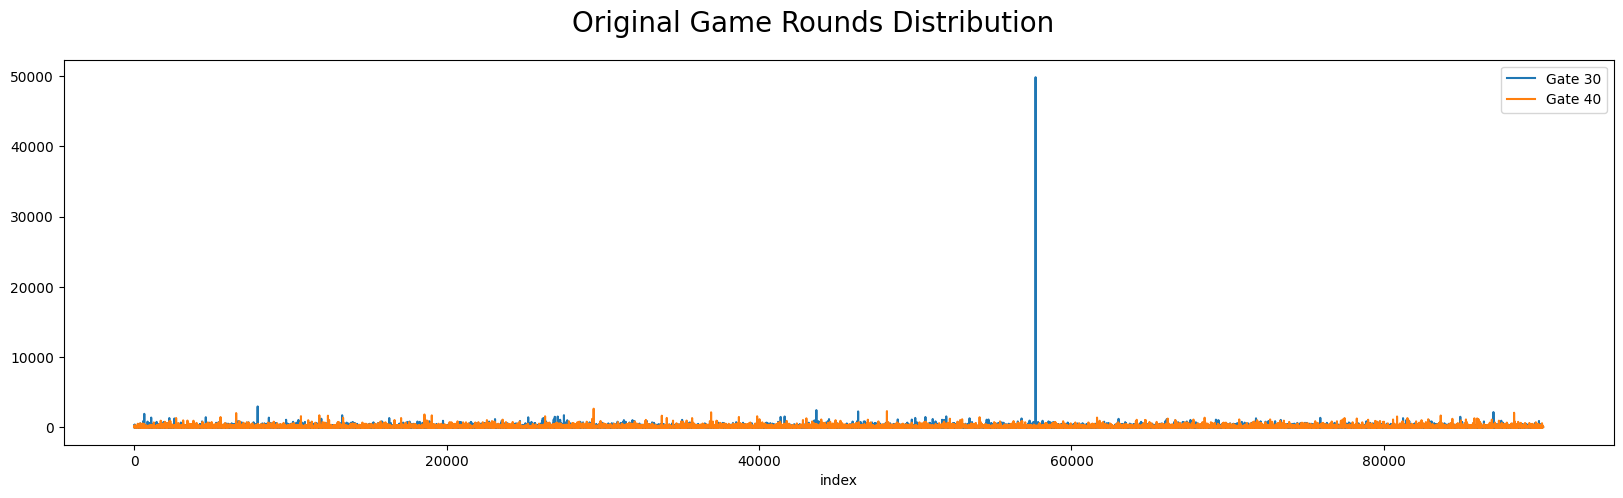

In [139]:
# Visualize the distribution of game rounds
game_gate_30.reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", figsize = (20,5))
game_gate_40.reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40")
plt.suptitle("Original Game Rounds Distribution", fontsize = 20);

In [183]:
# Remove the outlier (max in gate_30 = 49854)
game_gate_30 = game_gate_30.loc[game_gate_30['sum_gamerounds'] < game_gate_30['sum_gamerounds'].max()]
game_df = game_df.loc[game_df['sum_gamerounds'] < game_df['sum_gamerounds'].max()]

In [190]:
game_df.sum_gamerounds.agg(["count", "median", "mean", "std", "min", "max"])

count     90188.000000
median       16.000000
mean         51.320253
std         102.682719
min           0.000000
max        2961.000000
Name: sum_gamerounds, dtype: float64

In [191]:
# Check the summary statistics
game_gate_30.sum_gamerounds.agg(["count", "median", "mean", "std", "min", "max"])

count     44699.000000
median       17.000000
mean         51.342111
std         102.057598
min           0.000000
max        2961.000000
Name: sum_gamerounds, dtype: float64

Text(0.5, 1.0, 'Gate_40 sum_gamerounds')

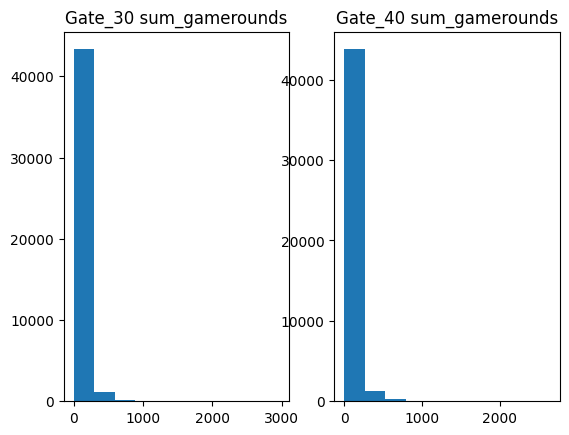

In [73]:
# Check data distribution for both group
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.hist(game_gate_30["sum_gamerounds"])
ax1.set_title('Gate_30 sum_gamerounds')

ax2.hist(game_gate_40["sum_gamerounds"])
ax2.set_title('Gate_40 sum_gamerounds')

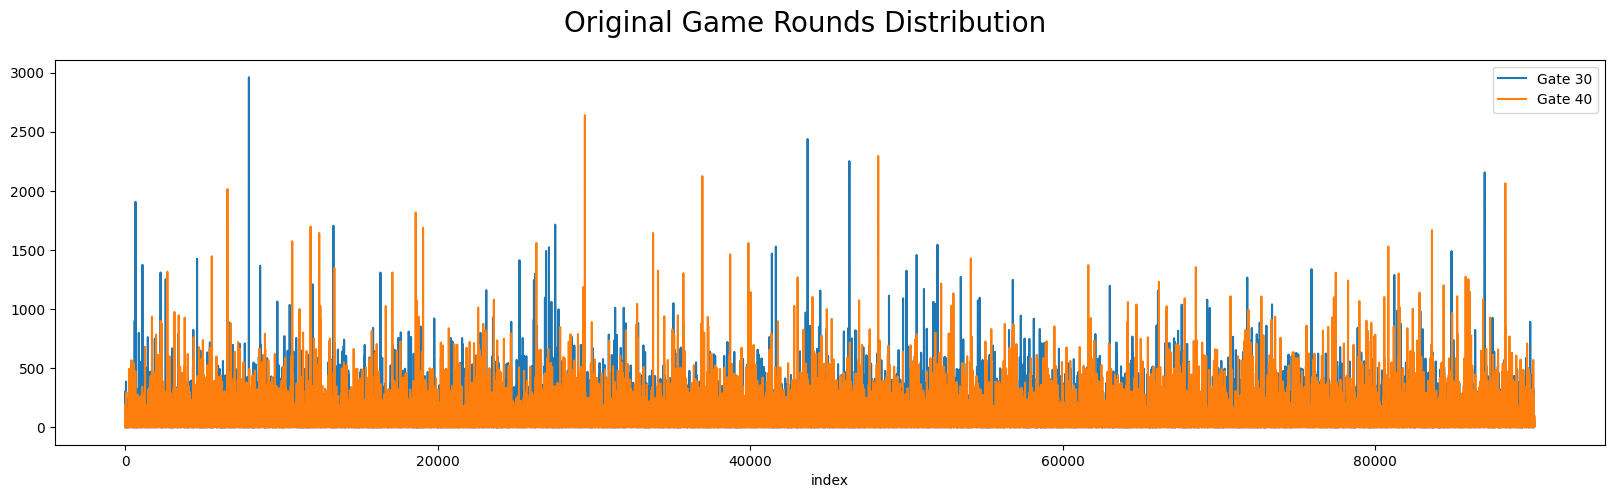

In [74]:
# Visualize the distribution of game rounds
game_gate_30.reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", figsize = (20,5))
game_gate_40.reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40")
plt.suptitle("Game Rounds Distribution After Remove the Outliers", fontsize = 20);

In [143]:
# Game Rounds vs Number of Users > Most of the users remain under 5 rounds
game_df.groupby("sum_gamerounds").userid.count().reset_index(name="count").sort_values(by="count", ascending=False).head()

,sum_gamerounds,count
1,1,5538
2,2,4606
0,0,3994
3,3,3958
4,4,3629


<AxesSubplot:xlabel='sum_gamerounds'>

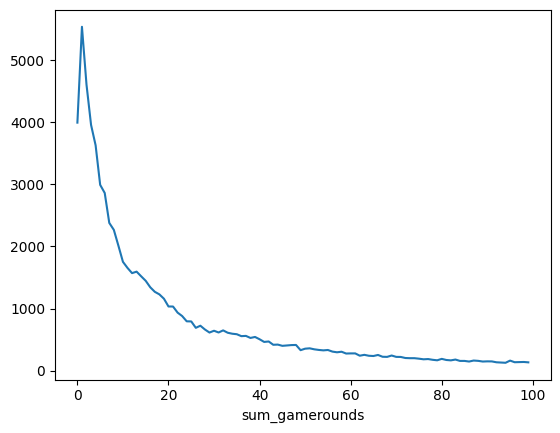

In [144]:
# How many users are there in first 100 rounds?
game_df.groupby("sum_gamerounds").userid.count()[:100].plot()

In [145]:
# How many users reach Level 30 and 40?
game_df.groupby("sum_gamerounds").userid.count().loc[[30,40]]

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64

In [146]:
# How many users come back and play 1/7 days after installing?
game_df["retention_1"].value_counts()/len(game_df)

False    0.554786
True     0.445214
Name: retention_1, dtype: float64

In [147]:
# How many users come back and play 1/7 days after installing?
game_df["retention_7"].value_counts()/len(game_df)

False    0.813944
True     0.186056
Name: retention_7, dtype: float64

In [148]:
# In gate_30 version, what proportion of user come back and play 1 day after installing?
game_gate_30.groupby("retention_1").sum_gamerounds.agg("count")/len(game_gate_30)

retention_1
False    0.551802
True     0.448198
Name: sum_gamerounds, dtype: float64

In [149]:
# In gate_40 version, what proportion of user come back and play 1 day after installing?
game_gate_40.groupby("retention_1").sum_gamerounds.agg("count")/len(game_gate_40)

retention_1
False    0.557717
True     0.442283
Name: sum_gamerounds, dtype: float64

In [150]:
# In each version, what proportion of user come back and play 7 days after installing?
game_gate_30.groupby("retention_7").sum_gamerounds.agg("count")/len(game_gate_30)

retention_7
False    0.809817
True     0.190183
Name: sum_gamerounds, dtype: float64

In [151]:
# In each version, what proportion of user come back and play 7 days after installing?
game_gate_40.groupby("retention_7").sum_gamerounds.agg("count")/len(game_gate_40)

retention_7
False    0.818
True     0.182
Name: sum_gamerounds, dtype: float64

In [152]:
# In each version, what proportion of user come back and play 1 and 7 days after installing?
len(game_gate_30.loc[(game_gate_30["retention_1"] == True) & (game_gate_30["retention_7"] == True)])/len(game_gate_30)


0.14935457169064184

In [153]:
# In each version, what proportion of user come back and play 1 and 7 days after installing?
len(game_gate_40.loc[(game_gate_40["retention_1"] == True) & (game_gate_40["retention_7"] == True)])/len(game_gate_40)

0.14302358812020488

### Step 2: A/B Testing

a. Define control and test group

b. Check normality (Shapiro Test)

c. Check heteroeneity (Levene Test)

- Parametric + No Heterogeneity: T-Test

- Parametric + Heterogeneity: Welch Test
    
- Non Parametric: Mann Whitney Test

In [186]:
# Define control and test group (A is gate_30)
game_df["version"] = np.where(game_df["version"] == "gate_30", "A", "B")

In [187]:
# Check the data
game_df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,False,False
1,337,A,38,True,False
2,377,B,165,True,False
3,483,B,1,False,False
4,488,B,179,True,True


In [214]:
# A/B Test Function
def ABTest(df, group, target):
    # Split the data into A and B
    GA = df[df[group] == "A"][target]
    GB = df[df[group] == "B"][target]
    # Check the normality
    NormalA = shapiro(GA)[1] < 0.05
    NormalB = shapiro(GB)[1] < 0.05
    # Normal Distribution
    if ((NormalA == False) & (NormalB == False)):
        Heterogeneity = stats.levene(GA, GB)[1] < 0.05
        if(Heterogeneity == False):
            # p-value is for two-tailed t-test
            t_test = stats.ttest_ind(GA, GB, equal_var = True)[1]
        else:
            t_test = stats.ttest_ind(GA, GB, equal_var = False)[1]
    else:
    # Non-Parametric
        t_test = stats.mannwhitneyu(GA, GB)[1]

    # Result Dataframe
    result = pd.DataFrame({
        "Two-Tailed Hypothesis":[t_test < 0.05],
        "P-Value": [t_test],
        "One-Tailed Hypothesis":[t_test/2]
    })
    result["Test Type"] = np.where((NormalA == False) & (NormalB == False), "Parametric", "Non-Parametric")
    result["One-Tailed Hypothesis"] = np.where(result["One-Tailed Hypothesis"] < 0.05, "Reject H0", "Fail to Reject H0")
    result["Two-Tailed Hypothesis"] = np.where(result["Two-Tailed Hypothesis"] == True, "Reject H0", "Fail to Reject H0")
    result["Comment for One-Tailed Test"] = np.where(result["One-Tailed Hypothesis"] == "Reject H0", "GA and GB are not similar", "GA and GB are similar") 
    result["Comment for Two-Tailed Test"] = np.where(result["Two-Tailed Hypothesis"] == "Reject H0", "GA and GB are not similar", "GA and GB are similar") 
    if ((NormalA == False) & (NormalB == False)):
        result["Heterogeneity"] = np.where(Heterogeneity == True, "Yes", "No")
        result = result[["Test Type", "One-Tailed Hypothesis", "Two-Tailed Hypothesis", "P-Value", "Heterogeneity", "Comment for One-Tailed Test", "Comment for Two-Tailed Test"]]
    else:
        result = result[["Test Type", "One-Tailed Hypothesis", "Two-Tailed Hypothesis", "P-Value", "Comment for One-Tailed Test", "Comment for Two-Tailed Test"]]
    return result


In [215]:
# Apply the function
ABTest(df = game_df, group = "version", target = "sum_gamerounds")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Test Type,One-Tailed Hypothesis,Two-Tailed Hypothesis,P-Value,Comment for One-Tailed Test,Comment for Two-Tailed Test
0,Non-Parametric,Reject H0,Fail to Reject H0,0.050892,GA and GB are not similar,GA and GB are similar
